In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections

In [ ]:
def load_data(filename):
    """
    Function loads data stored in the file filename and returns it as a numpy ndarray.
    
    Inputs:
        filename: given as a string.
        
    Outputs:
        Data contained in the file, returned as a numpy ndarray
    """
    return np.loadtxt(filename, skiprows=1, delimiter=',')

In [ ]:
data = load_data('https://raw.githubusercontent.com/charlesincharge/Caltech-CS155-2022/main/miniprojects/miniproject2/data/data.csv')
movies = pd.read_csv('https://raw.githubusercontent.com/charlesincharge/Caltech-CS155-2022/main/miniprojects/miniproject2/data/movies.csv')


In [ ]:
# add average ratings and frequency columns to the dataset
movie_ids = [x[1] for x in data]
counter = collections.Counter(movie_ids)

movie_to_ratings = {}
for movie_id in movie_ids:
  movie_to_ratings[movie_id] = []

# map each movie to a list of the ratings it has received
for user, movie, rating in data: 
  movie_to_ratings[movie].append(rating)
# average the ratings for each movie
for movie in movie_to_ratings:
  movie_to_ratings[movie] = np.mean(movie_to_ratings[movie])


rating_col = [x[1] for x in sorted(movie_to_ratings.items(), key=lambda x: x[0])]
movies['Rating'] = rating_col
frequency_col = [x[1] for x in sorted(counter.most_common(), key=lambda x:x)]
movies['Frequency'] = frequency_col


Text(0.5, 1.0, 'Visualization of all ratings in the MovieLens Database')

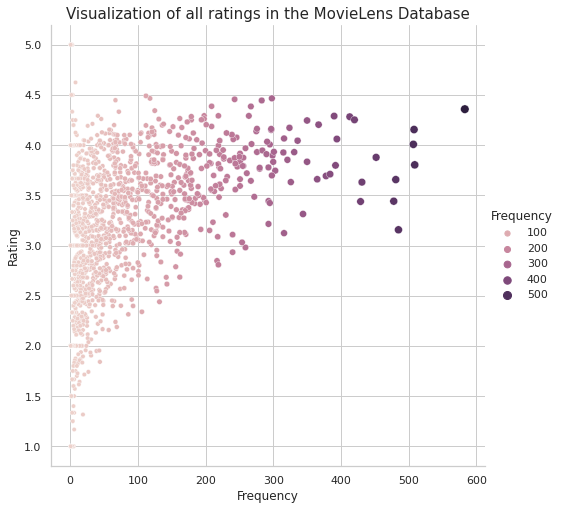

In [ ]:
sns.set_theme(style="whitegrid")

g = sns.relplot(
    data=movies,
    x="Frequency", y="Rating",
    size ="Frequency", hue = "Frequency", height = 7, 
  

)
plt.title("Visualization of all ratings in the MovieLens Database", fontsize = 15)


Text(0.5, 1.0, 'All Ratings of the Ten Most Popular Movies')

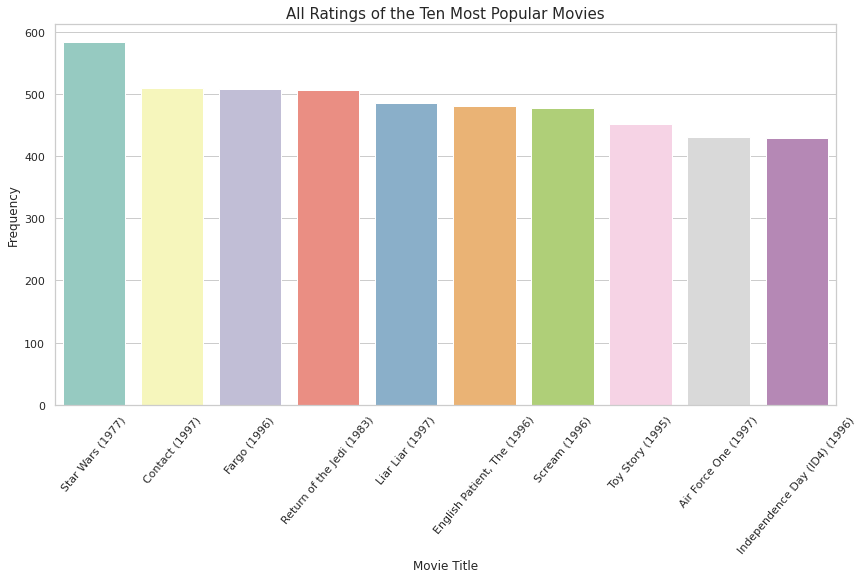

In [ ]:
popular10 = movies.sort_values(by=['Frequency'], ascending=False).iloc[:10]

plt.figure(figsize = (14,7))
color = sns.cubehelix_palette(as_cmap=True)
ax = sns.barplot(data = popular10, x = 'Movie Title', y = 'Frequency', palette = sns.color_palette("Set3", 10))

# ax = sb.barplot(x, y)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 50)

plt.title("All Ratings of the Ten Most Popular Movies", fontsize = 15)


Text(0.5, 1.0, 'All Ratings of the Ten Best Movies')

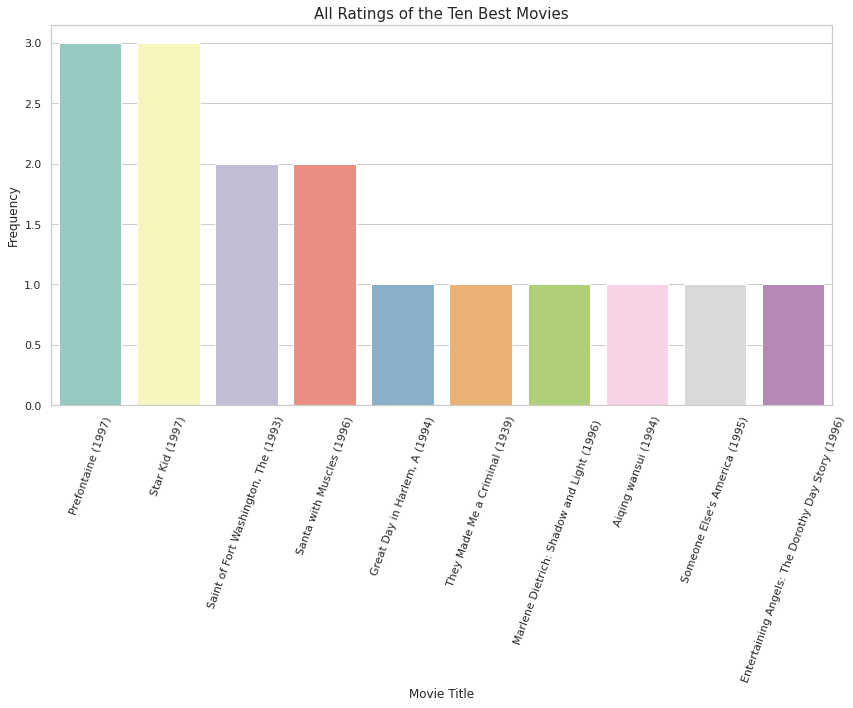

In [ ]:
best10 = movies[movies["Rating"] == 5.0].sort_values(by=['Frequency'], ascending=False).iloc[:10]

plt.figure(figsize = (14,7))
color = sns.cubehelix_palette(as_cmap=True)
ax = sns.barplot(data = best10, x = 'Movie Title', y = 'Frequency', palette = sns.color_palette("Set3", 10))

ax.set_xticklabels(ax.get_xticklabels(),rotation = 70)

plt.title("All Ratings of the Ten Best Movies", fontsize = 15)


In [ ]:
def plot_genre(genre):
  data = movies[movies[genre] == 1].sort_values(by=['Frequency', 'Rating'], ascending=False)
  plt.figure(figsize = (25,25))
  g = sns.relplot(
      data=data,
      x="Frequency", y="Rating",
      size ="Frequency", hue = "Frequency",
      height=7)

  for i in range(5):
      title = data.iloc[i]["Movie Title"]
      plt.annotate(title, (data.iloc[i]["Frequency"] + 0.3 , data.iloc[i]["Rating"] + 0.2))

  plt.title("All Ratings of %s Movies" %genre, fontsize = 15)

<Figure size 1800x1800 with 0 Axes>

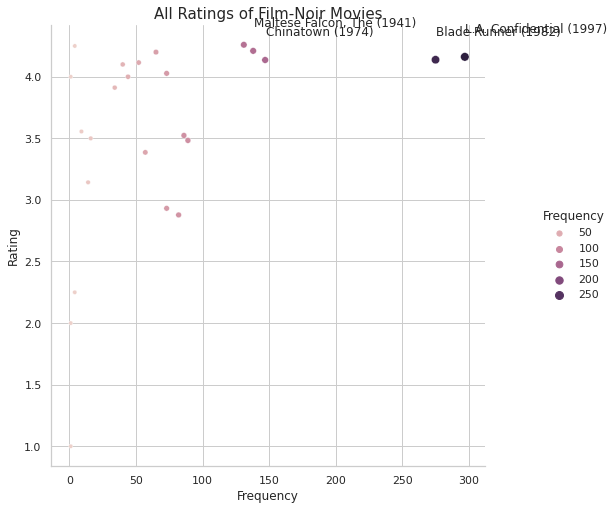

<Figure size 1800x1800 with 0 Axes>

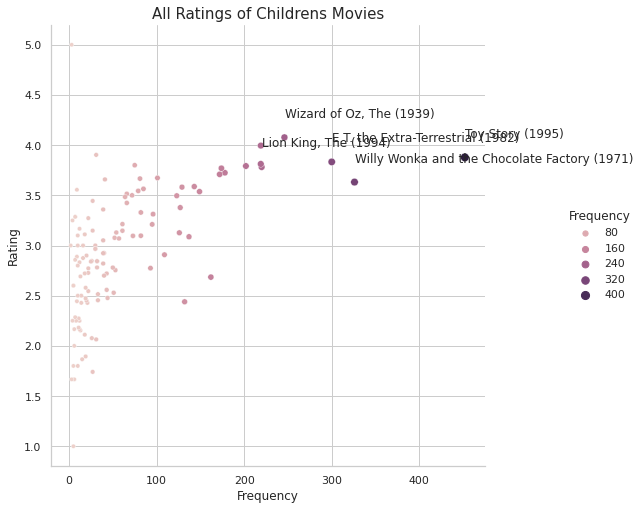

<Figure size 1800x1800 with 0 Axes>

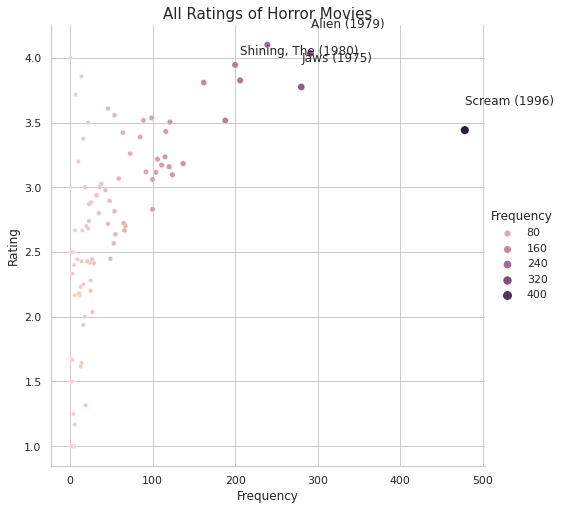

In [ ]:
plot_genre("Film-Noir")
plot_genre("Childrens")
plot_genre("Horror")